Course: INFO-629-686 - FA 25-26
Assignment 3: SUPERVISED LEARNING DEMO - CUSTOMER CHURN PREDICTION
Student: Anthony Parone
Date: November 2025

Dataset loaded: 7043 rows, 21 columns

Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data preprocessed. Shape: (7043, 20)

LABEL ENCODINGS

gender:
  Female               -> 0
  Male                 -> 1

Partner:
  No                   -> 0
  Yes                  -> 1

Dependents:
  No                   -> 0
  Yes                  -> 1

PhoneService:
  No                   -> 0
  Yes                  -> 1

MultipleLines:
  No                   -> 0
  No phone service     -> 1
  Yes                  -> 2

InternetService:
  DSL                  -> 0
  Fiber optic          -> 1
  No                   -> 2

OnlineSecurity:
  No                   -> 0
  No internet service  -> 1
  Yes                  -> 2

OnlineBackup:
  No                   -> 0
  No internet service  -> 1
  Yes                  -> 2

DeviceProtec

/var/folders/xm/528w29zd3317zxsm1m6xq1h80000gp/T/ipykernel_94582/1889694529.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_quartile = df_original.groupby(quartiles)['Churn'].agg(['mean', 'count'])
/var/folders/xm/528w29zd3317zxsm1m6xq1h80000gp/T/ipykernel_94582/1889694529.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_quartile = df_original.groupby(quartiles)['Churn'].agg(['mean', 'count'])
/var/folders/xm/528w29zd3317zxsm1m6xq1h80000gp/T/ipykernel_94582/1889694529.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

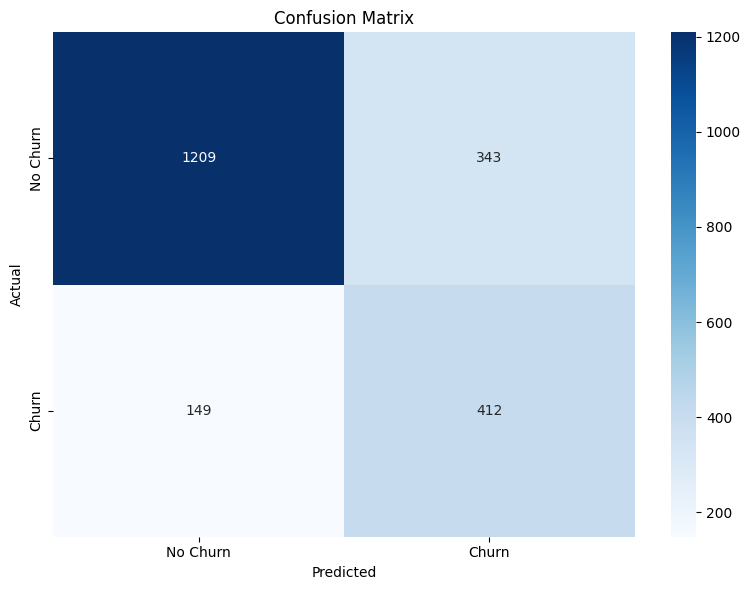

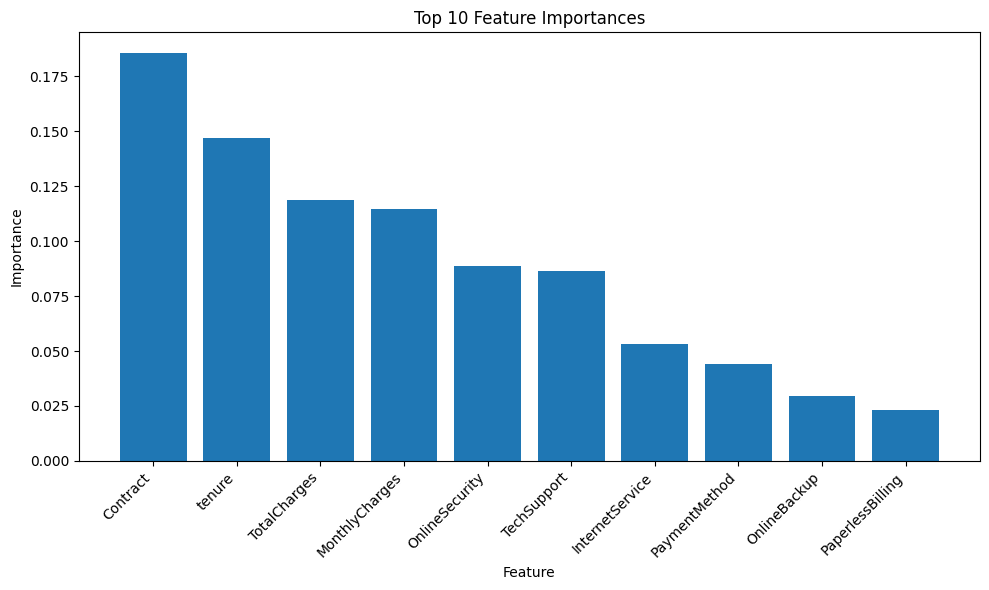

In [5]:
"""
Course: INFO-629-686 - FA 25-26
Assignment 3: SUPERVISED LEARNING DEMO - CUSTOMER CHURN PREDICTION
Student: Anthony Parone
Date: November 2025

Description
Binary Classification using Random Forest
Dataset: Telco Customer Churn from Kaggle
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Package Requirements:
pandas 2.3.2
numpy 2.2.6
scikit-learn 1.7.2
matplotlib 3.10.7
seaborn 0.13.2

Additional learning: need to further analyze what the evalaution metrics mean and learn how changing the configuration of the data or model training can improve the models usefullness.
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, 
    recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
import seaborn as sns


def load_data():
    #Load the Telco Customer Churn dataset
    #Download from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("\n" + "="*60)
    print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    print(f"\nChurn distribution:\n{df['Churn'].value_counts()}")
    print("="*60)
    return df

def preprocess_data(df):
    # Clean and prepare data for modeling
    df = df.copy()
    # Convert TotalCharges to numeric and fill missing values
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
    # Drop customerID
    df = df.drop('customerID', axis=1)
    # Convert target variable
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    # Encode categorical variables
    encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
    print("\n" + "="*60)
    print(f"Data preprocessed. Shape: {df.shape}")
    print("="*60)
    return df, encoders

def print_label_mappings(encoders):
    print("\n" + "="*60)
    print("LABEL ENCODINGS")
    print("="*60)
    for col, le in encoders.items():
        print(f"\n{col}:")
        for class_index, class_label in enumerate(le.classes_):
            print(f"  {class_label:20s} -> {class_index}")
    print("="*60)

def train_model(X_train, y_train):
    #Train Random Forest Classifier
    print("\n" + "="*60)
    print("Training Random Forest Classifier...")
    
    # Initialize model with balanced class weights
    model = RandomForestClassifier(
        n_estimators=100, # number of trees
        max_depth=10, # to prevent overfitting
        min_samples_split=10, # to prevent overfitting
        min_samples_leaf=4, # to prevent overfitting
        class_weight='balanced', # handle class imbalance, no churn was much higher than churn
        random_state=42, # for reproducibility
        n_jobs=-1 # number of cored to use; -1 means use all available cores
    
    )
    
    # Train model
    model.fit(X_train, y_train)
    print("Model training completed!")
    print("="*60)
    return model

def evaluate_model(model, X_test, y_test):
    #model evaluation: accuracy, precision, recall, f1-score, roc-auc, confusion matrix
    print("\n" + "="*60)
    print("Evaluating model on test set...")
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print("MODEL EVALUATION RESULTS")
    print(f"\nAccuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
    print(f"ROC-AUC:   {roc_auc:.4f} ({roc_auc*100:.2f}%)")
    
    print(f"\n{'CONFUSION MATRIX':^40}")
    print(f"{'':20} {'Predicted':^20}")
    print(f"{'':20} {'No Churn':^10} {'Churn':^10}")
    print(f"{'Actual No Churn':20} {tn:^10} {fp:^10}")
    print(f"{'Actual Churn':20} {fn:^10} {tp:^10}")
    
    print(f"\nTrue Negatives (TN):  {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP):  {tp}")
    
    print("\n" + classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    print("\nConfusion matrix saved as 'confusion_matrix.png'")
    print("="*60)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp}
    }

def feature_importance(model, feature_names):
    #Display feature importance and return sorted feature names
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("\n" + "="*60)
    print("TOP 10 MOST IMPORTANT FEATURES")
    for i in range(min(10, len(indices))):
        idx = indices[i]
        print(f"{i+1:2d}. {feature_names[idx]:30s} {importances[idx]:.4f}")
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    top_10_indices = indices[:10]
    plt.bar(range(10), importances[top_10_indices])
    plt.xticks(range(10), [feature_names[i] for i in top_10_indices], rotation=45, ha='right')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    print("\nFeature importance plot saved as 'feature_importance.png'")
    print("="*60)
    
    # Return sorted feature names (most important first)
    return [feature_names[i] for i in indices]

def analyze_feature_relationships(df_original, sorted_feature_names, encoders, top_n=10):
    """Analyze how top features relate to churn before encoding"""
    print("\n" + "="*80)
    print("FEATURE RELATIONSHIP ANALYSIS")
    print("How do top features relate to customer churn?")
    print("="*80)
    
    # Work with the original data before encoding
    top_features = sorted_feature_names[:top_n]
    
    for feature in top_features:
        print(f"\n{feature.upper()}:")
        print("-" * 60)
        
        # Get original values if it was encoded
        if feature in encoders:
            # Create a mapping back to original values
            le = encoders[feature]
            original_values = le.classes_
            
            # Calculate churn rate for each original category
            churn_rates = []
            for i, orig_val in enumerate(original_values):
                mask = df_original[feature] == i
                if mask.sum() > 0:
                    churn_rate = df_original[mask]['Churn'].mean()
                    count = mask.sum()
                    churn_rates.append((orig_val, churn_rate, count))
            
            # Sort by churn rate
            churn_rates.sort(key=lambda x: x[1])
            
            print(f"{'Category':<25} {'Churn Rate':<15} {'Count':<10}")
            print("-" * 60)
            for orig_val, churn_rate, count in churn_rates:
                risk = "🔴 HIGH" if churn_rate > 0.4 else "🟡 MEDIUM" if churn_rate > 0.25 else "🟢 LOW"
                print(f"{str(orig_val):<25} {churn_rate:>6.1%} {risk:<15} {count:>6}")
            
            # Interpretation
            lowest_churn = churn_rates[0]
            highest_churn = churn_rates[-1]
            print(f"\n💡 Insight:")
            print(f"   Lowest risk:  '{lowest_churn[0]}' ({lowest_churn[1]:.1%} churn)")
            print(f"   Highest risk: '{highest_churn[0]}' ({highest_churn[1]:.1%} churn)")
            
        else:  # Continuous feature
            # Divide into quartiles
            quartiles = pd.qcut(df_original[feature], q=4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'], duplicates='drop')
            churn_by_quartile = df_original.groupby(quartiles)['Churn'].agg(['mean', 'count'])
            
            print(f"{'Quartile':<25} {'Churn Rate':<15} {'Count':<10}")
            print("-" * 60)
            for idx, row in churn_by_quartile.iterrows():
                risk = "🔴 HIGH" if row['mean'] > 0.4 else "🟡 MEDIUM" if row['mean'] > 0.25 else "🟢 LOW"
                print(f"{str(idx):<25} {row['mean']:>6.1%} {risk:<15} {int(row['count']):>6}")
            
            # Interpretation
            low_churn = churn_by_quartile['mean'].iloc[0]
            high_churn = churn_by_quartile['mean'].iloc[-1]
            print(f"\n💡 Insight:")
            if low_churn > high_churn:
                print(f"   Higher {feature} = LOWER churn risk ✓")
                print(f"   (Lowest quartile: {low_churn:.1%} vs Highest quartile: {high_churn:.1%})")
            else:
                print(f"   Higher {feature} = HIGHER churn risk ⚠️")
                print(f"   (Lowest quartile: {low_churn:.1%} vs Highest quartile: {high_churn:.1%})")
    
    print("\n" + "="*80)

def examples(model, feature_names):
    #Examples
    print("\n" + "="*60)
    print("Prediction Examples")
    
    # Example 1
    example1 = {
        'gender': 1, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0,
        'tenure': 3, 'PhoneService': 1, 'MultipleLines': 0, 
        'InternetService': 1, 'OnlineSecurity': 0, 'OnlineBackup': 0,
        'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0,
        'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 1,
        'PaymentMethod': 2, 'MonthlyCharges': 95.0, 'TotalCharges': 285.0
    }
    
    # Example 2
    example2 = {
        'gender': 0, 'SeniorCitizen': 1, 'Partner': 1, 'Dependents': 1,
        'tenure': 60, 'PhoneService': 1, 'MultipleLines': 1,
        'InternetService': 0, 'OnlineSecurity': 2, 'OnlineBackup': 1,
        'DeviceProtection': 1, 'TechSupport': 1, 'StreamingTV': 1,
        'StreamingMovies': 1, 'Contract': 2, 'PaperlessBilling': 0,
        'PaymentMethod': 0, 'MonthlyCharges': 55.0, 'TotalCharges': 3300.0
    }
    
    # Example 3
    example3 = {
        'gender': 1, 'SeniorCitizen': 0, 'Partner': 1, 'Dependents': 0,
        'tenure': 18, 'PhoneService': 1, 'MultipleLines': 1,
        'InternetService': 1, 'OnlineSecurity': 0, 'OnlineBackup': 1,
        'DeviceProtection': 1, 'TechSupport': 1, 'StreamingTV': 0,
        'StreamingMovies': 1, 'Contract': 1, 'PaperlessBilling': 1,
        'PaymentMethod': 1, 'MonthlyCharges': 70.0, 'TotalCharges': 1260.0
    }
    
    examples = [
        ("Example 1: Tenure:3, expensive, month-to-month, no support", example1),
        ("Example 2: Tenure:60, 2-year contract, full services", example2),
        ("Example 3: Tenure:18, 1-year contract, mixed services", example3)
    ]
    
    for desc, example in examples:
        X_example = pd.DataFrame([example])[feature_names]
        pred = model.predict(X_example)[0]
        proba = model.predict_proba(X_example)[0]
        
        print(f"\n{desc}")
        print(f"  Prediction: {'CHURN' if pred == 1 else 'NO CHURN'}")
        print(f"  Probability: {proba[1]*100:.1f}% chance of churn")

    print("="*60)
        
def visualize_single_tree(model, feature_names, tree_index=0):
    #Visualize a single decision tree from the Random Forest model - results are cramped but
    
    # Get a single tree from the forest
    single_tree = model.estimators_[tree_index]
    
    # Create visualization
    plt.figure(figsize=(20, 10))
    plot_tree(single_tree, 
              feature_names=feature_names,
              class_names=['No Churn', 'Churn'],
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title(f'Decision Tree #{tree_index} from Random Forest')
    plt.tight_layout()
    plt.savefig(f'decision_tree_{tree_index}.png', dpi=300, bbox_inches='tight')
    print(f"\nDecision tree #{tree_index} saved as 'decision_tree_{tree_index}.png'")
    
    # Also export text representation
    tree_rules = export_text(single_tree, feature_names=feature_names)
    with open(f'tree_rules_{tree_index}.txt', 'w') as f:
        f.write(tree_rules)
    print(f"Tree rules saved as 'tree_rules_{tree_index}.txt'")


def main():

    #Starting the analysis
    print("="*60)
    print("Course: INFO-629-686 - FA 25-26")
    print("Assignment 3: SUPERVISED LEARNING DEMO - CUSTOMER CHURN PREDICTION")
    print("Student: Anthony Parone")
    print("Date: November 2025")
    print("="*60)
    
    # Load the data into a dataframe
    df = load_data()
    
    #2 Preprocess - this cleans up the data for the model training
    df_processed, encoders = preprocess_data(df)

    # Print label mappings
    print_label_mappings(encoders)
    
    #3 Split features and target
    #remove the column churn and leave all the features for X
    X = df_processed.drop('Churn', axis=1)
    #only the churn values get assigned to Y
    y = df_processed['Churn']
    print("\n" + "="*60)
    print(f"Class distribution:")
    print(f"  No Churn: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
    print(f"  Churn:    {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")
    print("="*60)
    
    #4 Train-test split
    '''
    train_test_split: A function from sklearn.model_selection that splits your dataset into training and testing subsets.
    X: Your feature matrix (all input variables except the target).
    y: Your target variable (Churn for this application).
    test_size=0.3: 30% of the data will be used for testing, and 70% for training.
    random_state=42: Sets a fixed seed for reproducibility. Using the same seed ensures you get the same split every time you run the code.
    stratify=y: Ensures that the proportion of classes (Churn vs. No Churn) is preserved in both training and testing sets. This is important for imbalanced datasets.
    -Train-test split - The Split Creates 4 Sets:
    `X_train` - Features for training (70% of data)
    `X_test` - Features for testing (30% of data)
    `y_train` - Target labels for training (70% of data)
    `y_test` - Target labels for testing (30% of data)
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print("="*60)
    print(f"Train set: {X_train.shape[0]} samples")
    print(f"Test set:  {X_test.shape[0]} samples")
    print("="*60)
    
    # Train model
    model = train_model(X_train, y_train)

    #5 Visualizations
    #vizualize one tree - interesting to see, but not requested in the assignment
    #visualize_single_tree(model, X.columns.tolist(), tree_index=0)
    
    #6 Evaluate the model
    metrics = evaluate_model(model, X_test, y_test)
    
    #7 Feature importance - returns sorted feature names
    sorted_feature_names = feature_importance(model, X.columns.tolist())
    
    #8 Analyze feature relationships with churn
    # This shows which feature values lead to more/less churn
    analyze_feature_relationships(df_processed, sorted_feature_names, encoders, top_n=10)
    
    #9 Examples
    examples(model, X.columns.tolist())
    
    print("\n" + "="*60)
    print("DEMO COMPLETED SUCCESSFULLY")
    print("="*60)

if __name__ == "__main__":
    main()